In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Objective

The goal of this project is to **select the best-performing machine learning model** by comparing several approaches.  
This includes performing **Exploratory Data Analysis (EDA)**, applying **Feature Engineering**, and evaluating different **regression algorithms** to find the most suitable one for predicting salaries.
ions
й

In [17]:
df = pd.read_csv("../data/raw_data.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

In [19]:
df.describe()['salary_usd']

count     15000.000000
mean     121991.938267
std       63968.361846
min       16621.000000
25%       74978.500000
50%      107261.500000
75%      155752.250000
max      410273.000000
Name: salary_usd, dtype: float64

### Goal is to predict salary_usd

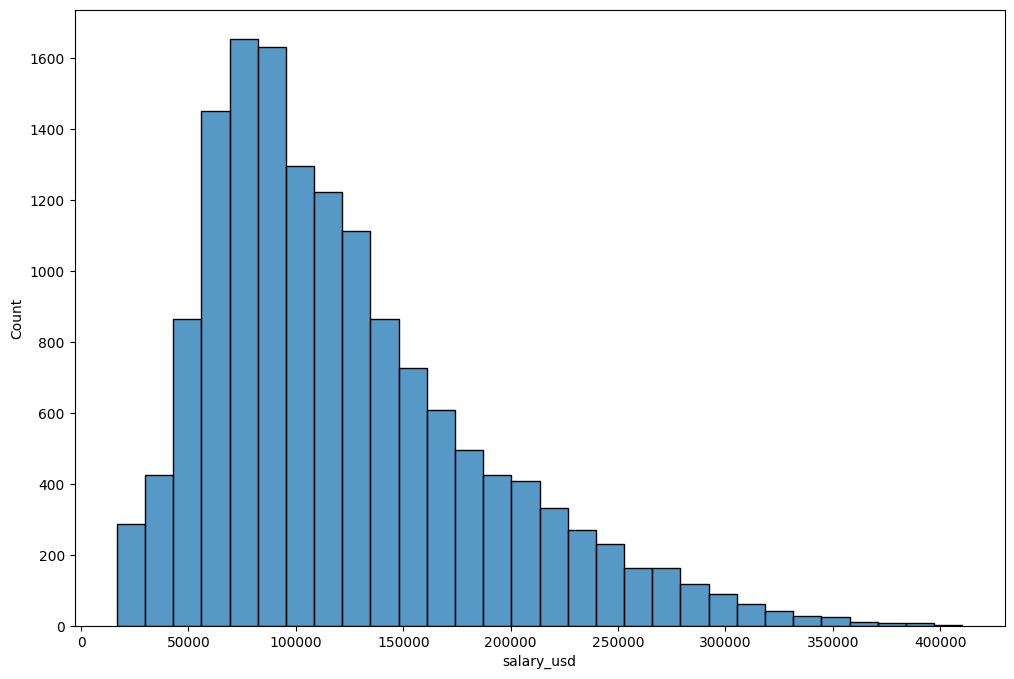

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.histplot(df.salary_usd, bins=30)

plt.show()


Outliers

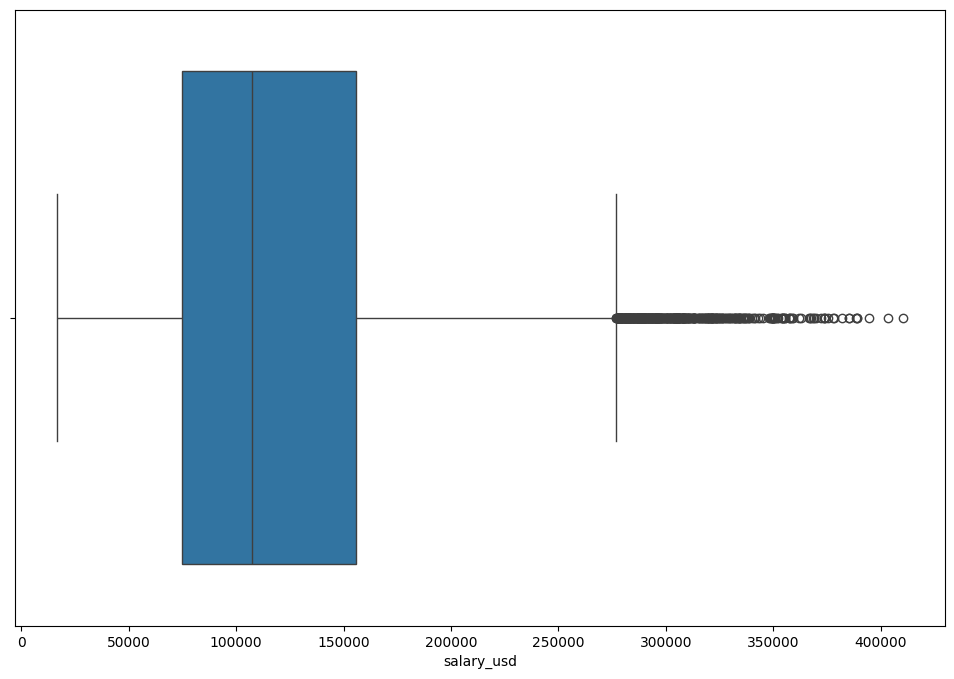

In [23]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.boxplot(df, x = df.salary_usd)

plt.show()

In [25]:
print(f"Number of people that have extraordinary salary: {len(df[(df.salary_usd > 280000) | (df.salary_usd < 18000)])} ")

Number of people that have extraordinary salary: 383 


In [26]:
df[(df.salary_usd > 280000) | (df.salary_usd < 18000)].head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
23,AI00024,AI Software Engineer,316709,USD,316709,EX,CT,Denmark,L,Denmark,50,"Data Visualization, Azure, Statistics",PhD,18,Transportation,2025-04-29,2025-06-21,1284,7.6,Autonomous Tech
103,AI00104,Machine Learning Engineer,283428,USD,283428,EX,CT,Denmark,L,Denmark,0,"Python, TensorFlow, MLOps, Data Visualization",Associate,13,Healthcare,2025-03-10,2025-05-11,1275,5.1,Smart Analytics
110,AI00111,Data Scientist,304859,USD,304859,EX,FT,Norway,L,Norway,100,"Linux, SQL, Mathematics",Bachelor,15,Media,2025-03-22,2025-05-05,2460,6.0,Advanced Robotics
188,AI00189,Data Analyst,357875,USD,357875,EX,PT,Norway,L,Norway,50,"Git, AWS, Linux, Tableau, Java",Associate,10,Retail,2024-01-19,2024-02-27,1044,8.0,Advanced Robotics
232,AI00233,Deep Learning Engineer,299354,CHF,269419,EX,FL,Switzerland,S,Switzerland,100,"MLOps, Scala, Docker",Bachelor,14,Retail,2024-06-16,2024-07-31,572,6.8,Advanced Robotics


In [27]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency', 'salary_local',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [28]:
df[df.columns].nunique()

job_id                    15000
job_title                    20
salary_usd                14359
salary_currency               8
salary_local              14458
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           50
remote_ratio                  3
required_skills           13651
education_required            4
years_experience             20
industry                     15
posting_date                486
application_deadline        543
job_description_length     2000
benefits_score               51
company_name                 16
dtype: int64

In [30]:
mean_salary = df.groupby('job_title').mean(numeric_only = True)['salary_usd']
mean_salary.sort_values()[:5]

job_title
Data Analyst                   116992.614441
Autonomous Systems Engineer    118878.059603
AI Consultant                  119756.120617
Head of AI                     120252.891583
AI Specialist                  120409.820413
Name: salary_usd, dtype: float64

### 5 Jobs with the highest mean salary

In [32]:
mean_salary.sort_values(ascending = False)[:5]

job_title
Data Engineer             127533.765930
AI Product Manager        126029.675393
Deep Learning Engineer    124395.492366
ML Ops Engineer           123466.609579
NLP Engineer              122867.780027
Name: salary_usd, dtype: float64

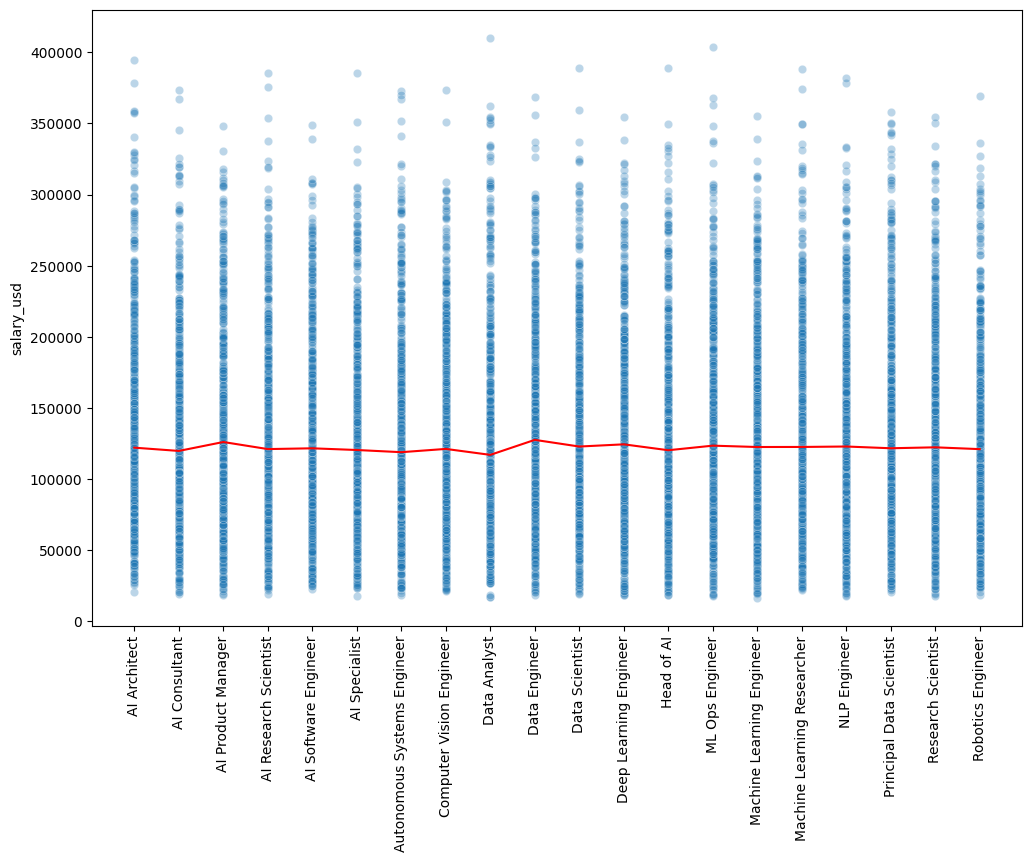

In [33]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.scatterplot(df, x = df.job_title.sort_values().values
                , y = df.salary_usd, alpha = 0.3)
plt.plot(mean_salary,c = 'r')

plt.xticks(rotation = 90)
plt.show()

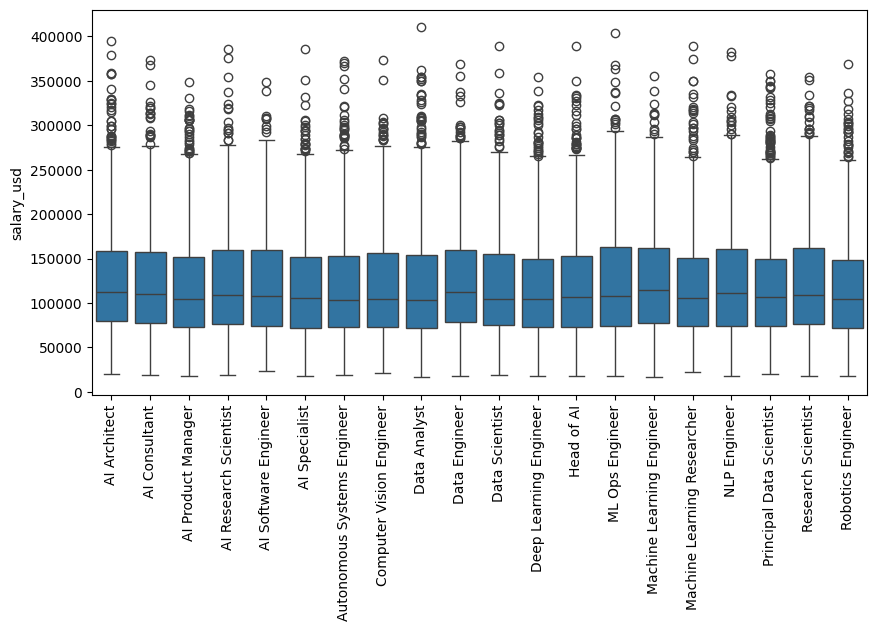

In [34]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.boxplot(df, x = df.job_title.sort_values().values
                , y = df.salary_usd)


plt.xticks(rotation = 90)
plt.show()

In [35]:
df.required_skills.str.split(',')

0                  [Python,  Computer Vision,  R,  Docker]
1                  [Kubernetes,  MLOps,  Tableau,  Python]
2                 [Spark,  Scala,  Hadoop,  PyTorch,  GCP]
3                       [MLOps,  Linux,  Tableau,  Python]
4                         [R,  Scala,  SQL,  GCP,  Python]
                               ...                        
14995         [Azure,  R,  NLP,  Docker,  Computer Vision]
14996    [Python,  TensorFlow,  Mathematics,  AWS,  Com...
14997    [Azure,  Kubernetes,  Spark,  Statistics,  MLOps]
14998    [MLOps,  Statistics,  Data Visualization,  R, ...
14999    [AWS,  Spark,  Computer Vision,  Data Visualiz...
Name: required_skills, Length: 15000, dtype: object

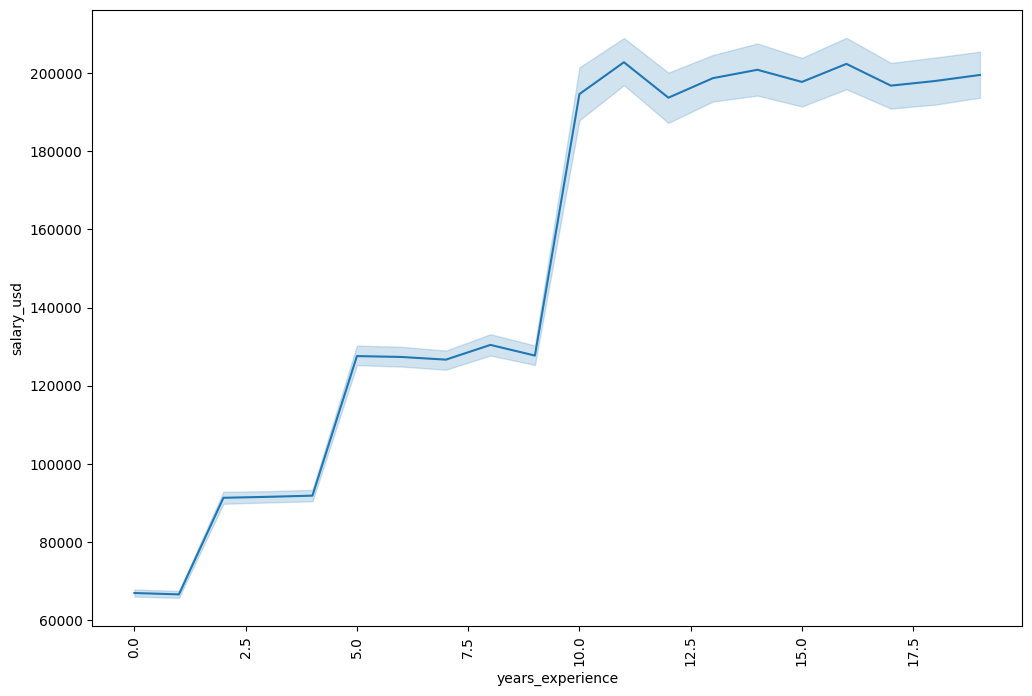

In [36]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.lineplot(df, x = df.years_experience
                , y = df.salary_usd)
plt.xticks(rotation = 90)
plt.show()

<Axes: >

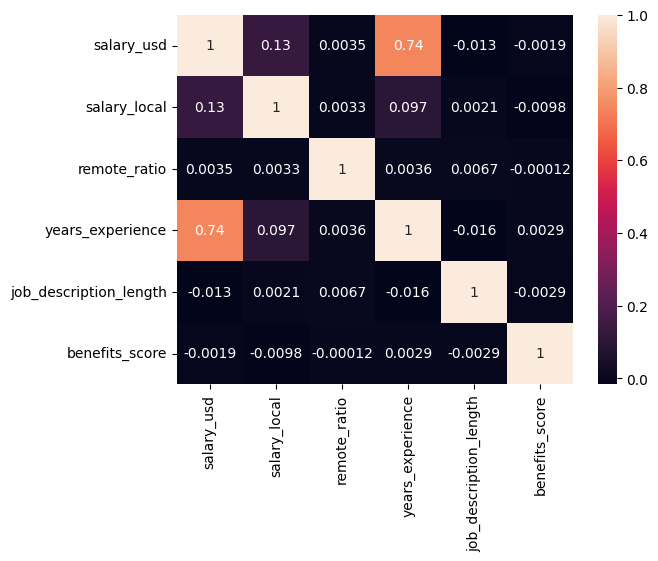

In [37]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

Years of experience influnce dramatically

### How categorical featues influence on salary

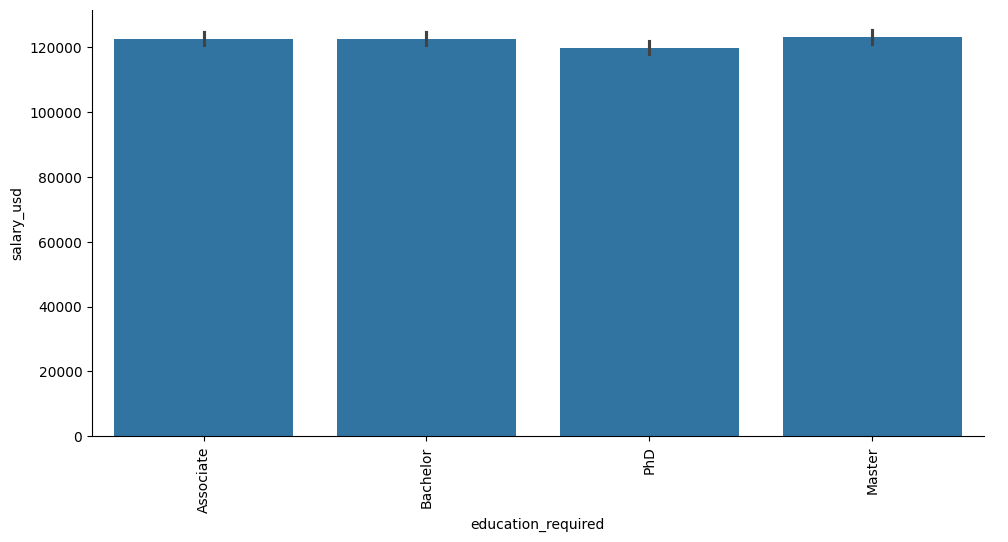

In [41]:
sns.catplot(data=df, x="education_required", y="salary_usd", kind="bar", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

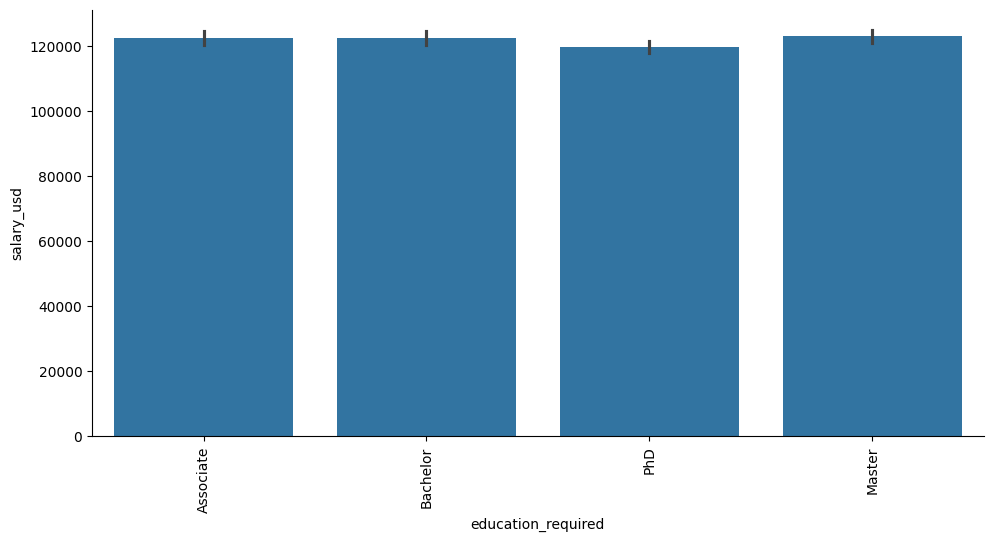

In [42]:
sns.catplot(data=df, x="education_required", y="salary_usd", kind="bar", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()


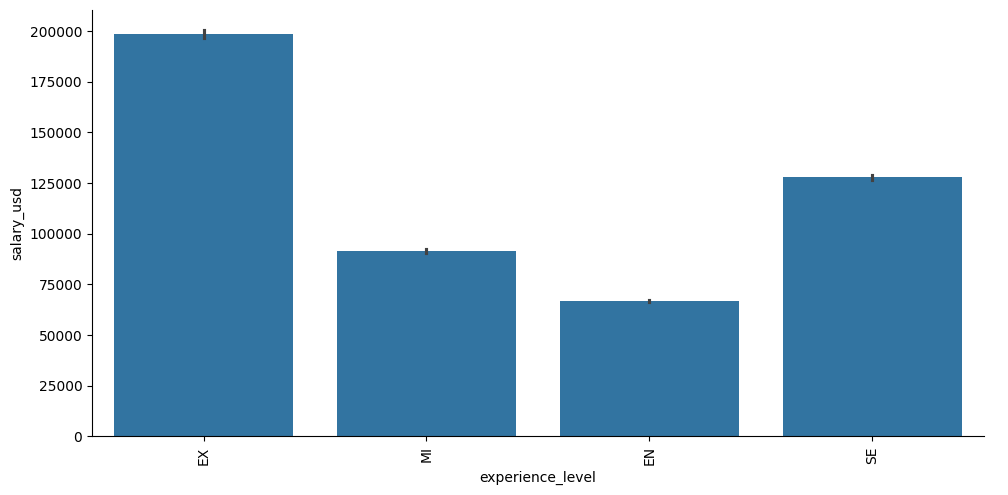

In [43]:
sns.catplot(data=df, x="experience_level", y="salary_usd", kind="bar", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

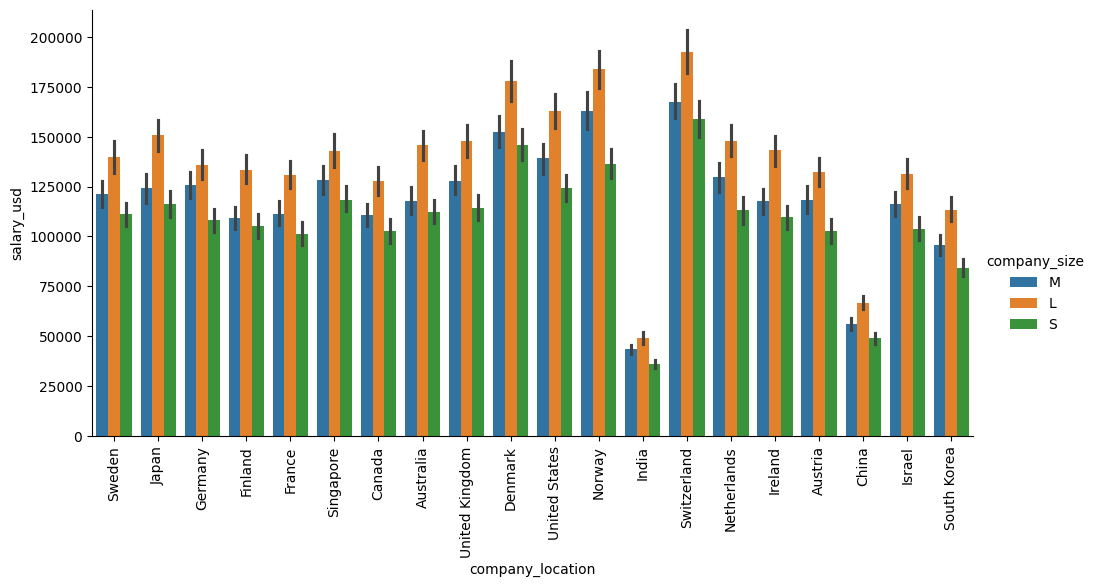

In [44]:
sns.catplot(data=df, x="company_location", y="salary_usd", kind="bar", height=5, aspect=2, hue = 'company_size')
plt.xticks(rotation=90)
plt.show()

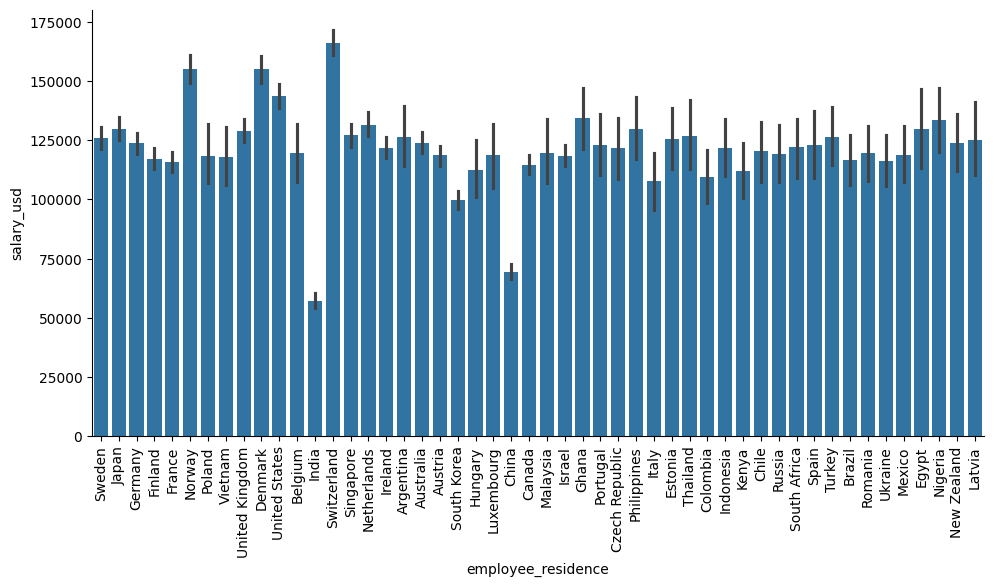

In [45]:
sns.catplot(data=df, x=df.employee_residence, y="salary_usd", kind="bar", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

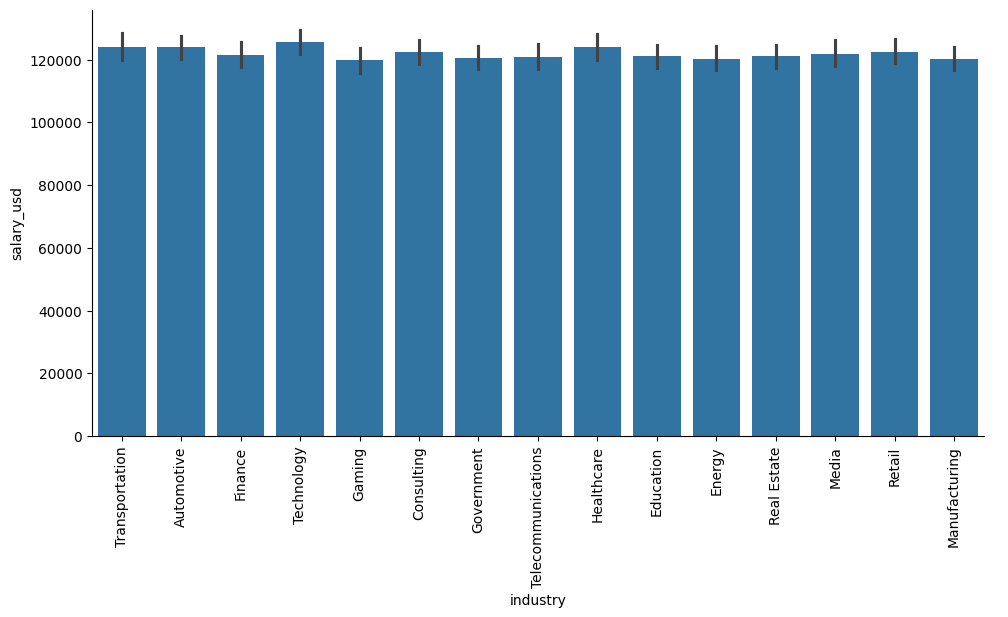

In [46]:
sns.catplot(data=df, x="industry", y="salary_usd", kind="bar", aspect=2)
plt.xticks(rotation=90)
plt.show()

#равномерно все

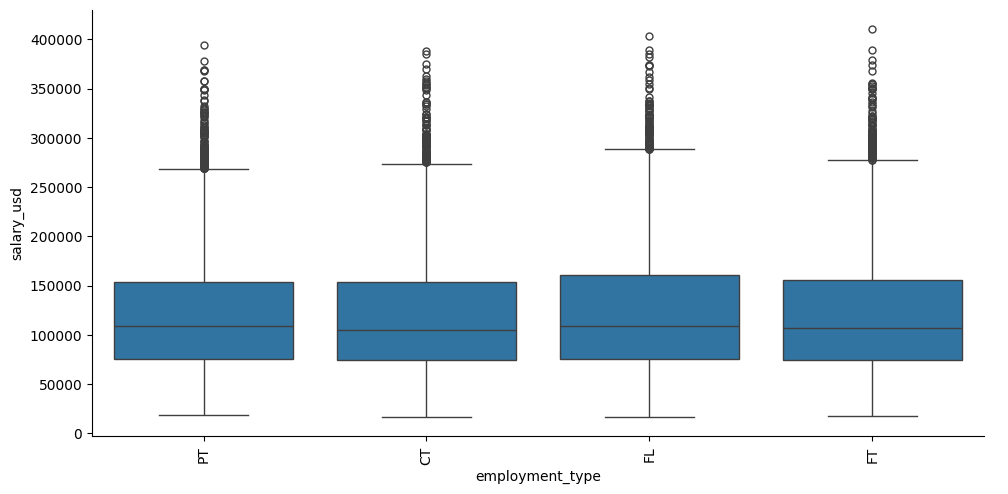

In [47]:
sns.catplot(data=df, x="employment_type", y="salary_usd", kind="box", aspect=2)
plt.xticks(rotation=90)
plt.show()

As a result `years_experience` and `company_location` influnce target the most